In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np

1. Crei un dataframe Pandas contenente le informazioni presenti nella collection

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv')
df

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


2. Elimini tutte le colonne ad esclusione di ‘borough’, ‘cuisine’ e ‘name’

In [ ]:
df = df.filter(['borough','cuisine','name']) #filter = serve a filtrare in questo caso fa passare solo queste colonne
df 

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


3. Conti il numero di ristoranti che hanno ‘Missing’ come quartiere

In [ ]:
df[df['borough']== 'Missing'].count()

borough    51
cuisine    51
name       51
dtype: int64

4. Sostituisca alla parola ‘Missing’ il valore null

In [ ]:
df['borough'].replace('Missing', np.nan, inplace= True)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


5. Elimini dal dataframe tutti i ristoranti di cui non si conosce il quartiere

In [ ]:
df.drop(df[(df['borough'].isnull())].index)

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


6. Calcoli il numero di ristoranti per ogni cucina. Ordinare in ordine decrescente a partire dal tipo di cucina
che ha più ristoranti

In [ ]:
df.groupby('cuisine')['name'].count().sort_values(ascending=False)

cuisine
American           6183
Chinese            2418
Café/Coffee/Tea    1214
Pizza              1163
Italian            1069
                   ... 
Iranian               2
Chilean               1
Californian           1
Polynesian            1
Creole/Cajun          1
Name: name, Length: 85, dtype: int64

7. Visualizzi il tipo di cucina con più ristoranti

In [ ]:
df2 = df.groupby('cuisine')['name'].count()
df2[df2 ==df2.max()]

cuisine
American    6183
Name: name, dtype: int64

8. Visualizzi un grafico a barre con i primi 10 tipi di cucina

In [ ]:
df3 = df.groupby('cuisine').count().sort_values(by = 'name',ascending=False).reset_index().head(10)         #creo un nuovo dataframe
df3

,cuisine,borough,name
0,American,6173,6183
1,Chinese,2412,2418
2,Café/Coffee/Tea,1210,1214
3,Pizza,1162,1163
4,Italian,1069,1069
5,Other,1007,860
6,"Latin (Cuban, Dominican, Puerto Rican, South &...",850,850
7,Japanese,758,760
8,Mexican,753,754
9,Bakery,689,691


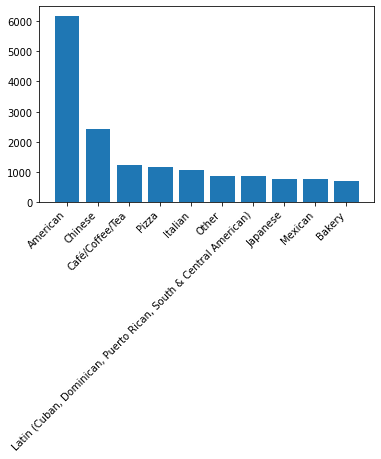

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.bar(df3['cuisine'],df3['name'].values)
fig.autofmt_xdate(rotation=45)


9. Calcoli il numero di ristoranti per ogni quartiere

In [ ]:
df.groupby('borough').count()

,cuisine,name
borough,,
Bronx,2338,2322
Brooklyn,6086,6046
Manhattan,10259,10211
Queens,5656,5615
Staten Island,969,963


10. Visualizzi i dati precedenti in un grafico a torta

In [ ]:
df4 = df.groupby('borough').count().sort_values(by = 'name',ascending=False).reset_index()
df4

,borough,cuisine,name
0,Manhattan,10259,10211
1,Brooklyn,6086,6046
2,Queens,5656,5615
3,Bronx,2338,2322
4,Staten Island,969,963


<function matplotlib.pyplot.show>

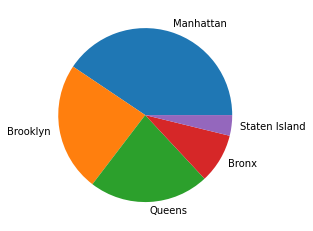

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.pie(df4['name'].values,labels= df4['borough'])
plt.show

11. Visualizzi i due grafici affiancati. Dare titoli appropriati ad entrambi i grafici.

<function matplotlib.pyplot.show>

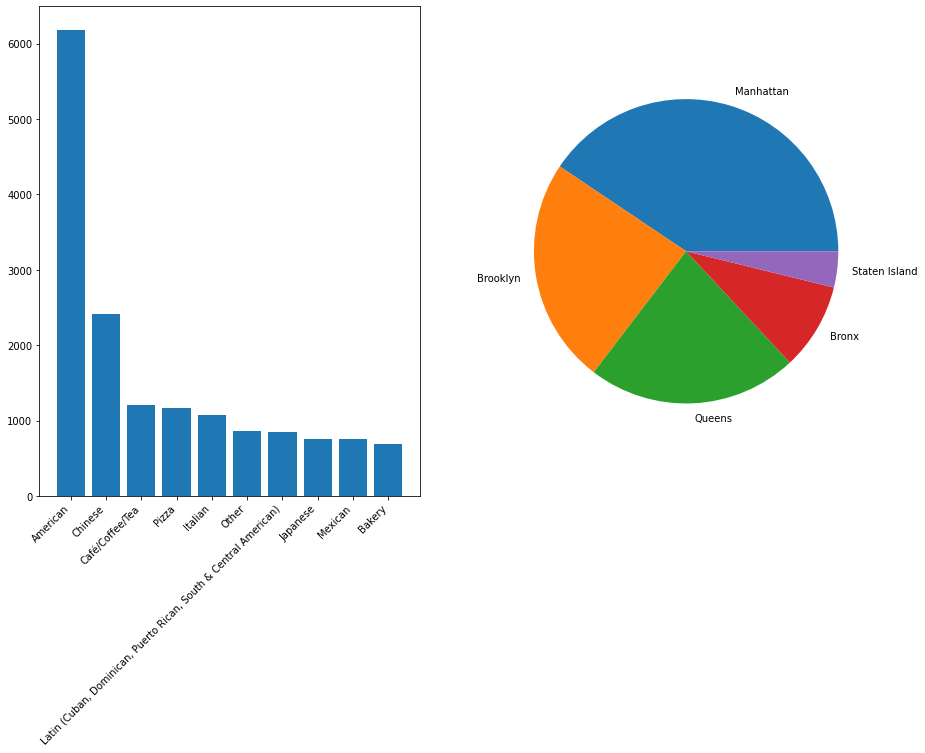

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(15,10)
ax1.bar(df3['cuisine'],df3['name'].values)
fig.autofmt_xdate(rotation=45)
ax2.pie(df4['name'].values,labels= df4['borough'])
plt.show

12. Crei un nuovo dataframe sostituendo la parola &#39;non American&#39; a tutti i tipi di cucina che non sono
americani

In [ ]:
df = df.replace(df[df['cuisine']!='American']['cuisine'].tolist(),'non American')
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,non American,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,non American,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,non American,Camden Food Express
25355,Manhattan,non American,Wooly'S Nyc
25356,Manhattan,non American,Rafi 786
25357,Brooklyn,non American,NaN


13. Visualizzi, per ogni quartiere, il numero di ristoranti di cucina americana e non americana. Il risultato
deve essere il seguente:

In [ ]:
data = df.groupby(['borough','cuisine']).count()
data

index  name
borough       cuisine                  
Bronx         American        411   411
              non American   1927  1911
Brooklyn      American       1273  1273
              non American   4813  4773
Manhattan     American       3205  3205
              non American   7054  7006
Queens        American       1040  1040
              non American   4616  4575
Staten Island American        244   244
              non American    725   719

14. crei un nuovo dataframe che abbia una colonna che contiene i ristoranti di cucina americana e una
colonna che contiene il numero di ristoranti che propongono cucine non americane. Il risultato deve
essere il seguente:

In [ ]:
data.unstack()    #separa le zone e le rimette in posizioni diverse secondo un criterio

index                  name             
cuisine       American non American American non American
borough                                                  
Bronx              411         1927      411         1911
Brooklyn          1273         4813     1273         4773
Manhattan         3205         7054     3205         7006
Queens            1040         4616     1040         4575
Staten Island      244          725      244          719

15. resetti l&#39;indice in modo da avere le tre colonne necessarie per costruire un grafico a barre. Il risultato
deve essere il seguente:

In [ ]:
df = data.reset_index()
df

,borough,cuisine,index,name
0,Bronx,American,411,411
1,Bronx,non American,1927,1911
2,Brooklyn,American,1273,1273
3,Brooklyn,non American,4813,4773
4,Manhattan,American,3205,3205
5,Manhattan,non American,7054,7006
6,Queens,American,1040,1040
7,Queens,non American,4616,4575
8,Staten Island,American,244,244
9,Staten Island,non American,725,719
